# Data Wrangling with Python: Activity 9, page 294

### Import the necessary libraries, including regex and beautifulsoup

In [1]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

### Check the SSL certificate

In [2]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

### Read the HTML from the URL

In [3]:
# Read the HTML from the URL and pass on to BeautifulSoup
url = 'https://www.gutenberg.org/browse/scores/top'
#send a GET request to the url --> returns a Response Object
response = requests.get(url)

### Write a small function to check the status of the web request

In [4]:
def check_status(resp):
    #if response status is 200, then connection was success
    if resp.status_code == 200:
        print('Status code is 200. Connection successful!')
        return 1
    #all status codes besides 200 shows issues
    else:
        print('Connection was not successful')
        return -1

### Decode the response and pass this on to BeautifulSoup for HTML parsing

In [5]:
#running check_status function on response variable to check status code
check_status(response)

Status code is 200. Connection successful!


1

In [6]:
#getting contents of the response for BeautifulSoup
content = response.content.decode(response.encoding)
#creating BeautifulSoup object 
soup = BeautifulSoup(content,'html.parser')

### Find all the href tags and store them in the list of links. Check what the list looks like - print the first 30 elements.

In [7]:
#instantiate list of links
links_with_text = []

#for loop to find all href tags in HTML
for a in soup.find_all('a',href=True):
    #href tag falls under 'a'
    if a.text:
        links_with_text.append(a['href'])

In [8]:
#print first 30 elements
links_with_text[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

### Use a regular expresson to find the numeric digits in these links. File numbers for the top 100 eBooks

- Use regex to find the numeric digits in the link href string
- Use the findall method

In [9]:
#list to hold file numbers
file_nums = []

In [10]:
#numbers 19 to 118 in the link list have top 100 ebooks

#loop over number range
for i in range(19,119):
    #access certain link
    link = links_with_text[i]
    #strip of punctuation and white space
    link = link.strip()
    #regular expression for finding numeric digits
    dig = re.findall('[0-9]+',link)
    #if we actually find a digit, add to list and cast to int
    if len(dig)==1:
        file_nums.append(int(dig[0]))

In [11]:
#printing the file numbers
print(file_nums)

[1, 1, 7, 7, 30, 30, 1342, 84, 46, 11, 2701, 4980, 25344, 66723, 1661, 63256, 174, 345, 32992, 66720, 66717, 98, 1232, 32449, 2542, 1080, 64317, 1952, 43, 205, 1260, 5200, 2148, 844, 4300, 8492, 2554, 66721, 2600, 219, 514, 2591, 40754, 6130, 76, 66718, 25942, 66714, 1184, 1400, 16, 5740, 30254, 2500, 45, 27827, 996, 74, 66724, 58585, 120, 66716, 28054, 41, 2814, 135, 1998, 7370, 408, 3207, 3600, 55, 2852, 66713, 158, 43453, 36, 16328, 1727, 1497, 10007, 4363, 23, 9551, 1228, 1250, 1399, 730, 829, 215, 768, 66712]


### What does the soup object's text look like? Use the .text method and print only the first 2,000 characters

In [12]:
#using soup.text method
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2021-11-13138492
last 7 days1223977
last 30 days5037139



Top 100 EBooks yesterd

### Search in the extracted text (using regex) from the soup object to find the names of the top 100 eBooks

In [13]:
#creating temporary list of EBook names
book_names_temp = []

In [14]:
#point starting index to "Top 100 Ebooks yesterday" text
#split lines will split each line of text
#find index of title
start = soup.text.splitlines().index('Top 100 EBooks yesterday')

In [15]:
#loop 1-100
#add the strings of the next 100 lines to this temporary list
for i in range(100):
    #append line that starts from index of title and skips over spaces (+10)
    #book_names_temp.append(soup.text.splitlines()[start+2+i])
    book_names_temp.append(soup.text.splitlines()[start+10+i])

In [16]:
print(book_names_temp)

['Pride and Prejudice by Jane Austen (1338)', 'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (1249)', 'A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (760)', "Alice's Adventures in Wonderland by Lewis Carroll (684)", 'Moby Dick; Or, The Whale by Herman Melville (637)', 'Old Granny Fox by Thornton W.  Burgess (622)', 'The Scarlet Letter by Nathaniel Hawthorne (586)', "Stop, You're Killing Me! by Stephen Marlowe (540)", 'The Adventures of Sherlock Holmes by Arthur Conan Doyle (537)', 'The American Diary of a Japanese Girl by Yoné Noguchi (528)', 'The Picture of Dorian Gray by Oscar Wilde (515)', 'Dracula by Bram Stoker (514)', 'The Youngest Girl in the School by Evelyn Sharp (513)', 'In Kentucky with Daniel Boone by John Thomas McIntyre (450)', 'A Life Unveiled by Anonymous (444)', 'A Tale of Two Cities by Charles Dickens (440)', 'The Prince by Niccolò Machiavelli (410)', 'Japanese Girls and Women by Alice Mabel Bacon (379)', "A D

In [17]:
#use regex to extract only text from the name strings and append it to an empty list

#empty list
book_text = []

#loop through 100 titles
for i in range(100):
    #finding indices 
    #attempts to match text to name strings
    #use span function to return a tuple containing start and end positions of the matched expression
    idx1,idx2 = re.match('^[a-zA-Z ]*',book_names_temp[i]).span()
    #append only text into new list
    book_text.append(book_names_temp[i][idx1:idx2])

In [18]:
#print list of book names
print("Here are the names of the Top 100 EBooks!\n")
for text in book_text:
    print(text)

Here are the names of the Top 100 EBooks!

Pride and Prejudice by Jane Austen 
Frankenstein
A Christmas Carol in Prose
Alice
Moby Dick
Old Granny Fox by Thornton W
The Scarlet Letter by Nathaniel Hawthorne 
Stop
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
The American Diary of a Japanese Girl by Yon
The Picture of Dorian Gray by Oscar Wilde 
Dracula by Bram Stoker 
The Youngest Girl in the School by Evelyn Sharp 
In Kentucky with Daniel Boone by John Thomas McIntyre 
A Life Unveiled by Anonymous 
A Tale of Two Cities by Charles Dickens 
The Prince by Niccol
Japanese Girls and Women by Alice Mabel Bacon 
A Doll
A Modest Proposal by Jonathan Swift 
The Great Gatsby by F
The Yellow Wallpaper by Charlotte Perkins Gilman 
The Strange Case of Dr
Walden
Jane Eyre
Metamorphosis by Franz Kafka 
The Works of Edgar Allan Poe 
The Importance of Being Earnest
Ulysses by James Joyce 
The King in Yellow by Robert W
Crime and Punishment by Fyodor Dostoyevsky 
At Odds with the Regent
War a

# Data Wrangling with Python: Activity 10, page 295

Building Your Own Movie Database by Reading an API

In [19]:
#import required libaries
import urllib.request
import urllib.parse
import urllib.error
import json
import os

Load the secret API key from a JSON file stored in the same folder in a variable, by using json.loads

In [20]:
#converting text file to JSON
filename = 'APIkeys.txt'
#dictionary where the lines from text will be stored
dict1 = {}
#creating dictionary
with open(filename) as fh:
    for line in fh:
        #read each line and trim of extra spaces, only gets words
        command, description = line.strip().split(None,1)
        dict1[command]=description.strip()
        
#create JSON file
out_file = open("APIkeys.json","w")
json.dump(dict1,out_file,indent=4,sort_keys=False)
out_file.close()

Open the APIkeys.json file

In [21]:
#open the APIkeys.json file which holds api key
with open('APIkeys.json') as f:
    keys = json.load(f)
    #retrieve API key to feed into URL
    omdbkey = keys['OMDBapi']

Assign the OMDB portal as a string to a variable

In [22]:
#assign omdb portal as a string to a variable
call = 'http://www.omdbapi.com/?'

Create a variable called apikey with the last portion of the URL

In [23]:
apikey = '&apikey=' + omdbkey

In [24]:
#update call variable with apikey portion
url_call = call +apikey

In [25]:
#make request to the url with the API key
#use urlopen function to open the URL which can either be a string or a Request object
response = urllib.request.urlopen(url_call)

In [26]:
#creating function for checking HTML status function
def check_urlStatus(resp):
    if resp.getcode() == 200:
        print("Status code is 200. Connection successful!")
    else:
        print("Connection failed.")

In [27]:
check_urlStatus(response)

Status code is 200. Connection successful!


Write a utility function called print_json to print the movie data from a JSON file. 

- Keys: title, year, rated, released, runtime, genre, director, writer, actors, plot, language, country, awards, ratings, metascore, imdbrating, imdbvotes, imdbid

In [28]:
def print_json(data):
    #read in list of keys for movie data JSON file
    list_keys = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language','Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    for key in list_keys:
        #if the key is found in the JSON file that is being read in
        if key in list(data.keys()):
            #print key and its value
            print(f"{key}:{data[key]}")

Write an utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. 

In [29]:
def download_poster(data):
    #read in title from JSON dataset
    title = data['Title']
    #read in poster if available for this movie title
    poster = data['Poster']
    #split the poster url by '.' and pick up last string as file extension
    #[-1] picks up last string from split
    poster_file_ext = poster.split('.')[-1]
    #read image file from web --> open url
    poster_url = urllib.request.urlopen(poster).read()
    
    #open a file
    poster_dict = os.getcwd()+'\\'+'Posters'+'\\'
    #handling directories
    #if directory does not already exist
    if not os.path.isdir(poster_dict):
        #make the directory
        os.mkdir(poster_dict)
        
    #creating file to hold poster data
    #title plus file extension
    img_file=poster_dict+str(title)+'.'+poster_file_ext
    f=open(img_file,'wb')
    #write the data to the image file
    f.write(poster_url)
    #close the file
    f.close()

Write a utility function called search_movie to search for a movie by its name, print the downloaded JSON data, and save the movie poster in a local folder.

In [30]:
def search_movie(title):
    #using try-except loop
    try:
        #using urllib.parse.urlencode function to convert a mapping object to a percent-encoded ASCII text string
        url = call + urllib.parse.urlencode({'t':str(title)})+apikey
        #opening url and parsing JSON string into Python dict
        print(f'Retrieving the data of "{title}"')
        print(url)
        #make request to the url
        resp = urllib.request.urlopen(url)
        data = resp.read()
        #parse JSON string into Python dict
        #retrieve data from JSON
        json_data=json.loads(data)
              
        #Using key Response to determine if read was successful
        #if successful
        if json_data['Response']=='True':
              print_json(json_data)
              #do you want to download the poster?
              if json_data['Poster']!='N/A':
                download_poster(json_data)
        #if not successful
        else:
              print("Read was not successful!")
              #print the JSON key Error
              print(json_data['Error'])
    
    #handling URLError
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

Test the search_movie function by entering Titanic

In [31]:
#testing search_movie with "Titanic" as input parameter
search_movie("Titanic")

Retrieving the data of "Titanic"
http://www.omdbapi.com/?t=Titanic&apikey=74315a9e
Title:Titanic
Year:1997
Rated:PG-13
Released:19 Dec 1997
Runtime:194 min
Genre:Drama, Romance
Director:James Cameron
Writer:James Cameron
Actors:Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot:A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language:English, Swedish, Italian, French
Country:United States, Mexico, Australia
Awards:Won 11 Oscars. 125 wins & 83 nominations total
Ratings:[{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore:75
imdbRating:7.8
imdbVotes:1,098,236
imdbID:tt0120338


Test the search_movie function by entering "Random_error"

In [32]:
#taking "Random_error" as input parameter to search_movie function
search_movie("Random_error")

Retrieving the data of "Random_error"
http://www.omdbapi.com/?t=Random_error&apikey=74315a9e
Read was not successful!
Movie not found!


# Connect to the Twitter API and do a simple data pull

In [33]:
#import the Twitter library
import twitter

#enter credentials for Twitter API account
api = twitter.Api(consumer_key='wNeVFamVEYgP2FsHtPS2a2W9Z',
  consumer_secret='fzBOVtg4HWnuE1i1J5BfLAb4SLjwx27kTpitrizT5JJ0JsCopI',
    access_token_key='1453524458317230082-z4u3QBiPH3IvUugg1glG6toUcxiQz2',
    access_token_secret='BPvicbighOXXQtR9xR10hNW26QBunlg1F0IrgfJxHqh9P')

In [34]:
#check if credentials were correct and connection is complete
print(api.VerifyCredentials())

{"created_at": "Thu Oct 28 00:52:07 +0000 2021", "default_profile": true, "default_profile_image": true, "id": 1453524458317230082, "id_str": "1453524458317230082", "name": "emphillips", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "emphillips20", "withheld_in_countries": []}


In [35]:
#search tweets for terms: "Data Science"
#tweets since 2016-11-21
#cap at 10 tweets being returned
api.GetSearch(term='Data Science', since=2016-11-21, count=10)

[Status(ID=1459932891765297153, ScreenName=MIT_CSAIL, Created=Sun Nov 14 17:15:00 +0000 2021, Text='9 Distance Measures in data science with algorithms. \n\nvia: @gp_pulipaka https://t.co/37izyWPL9b'),
 Status(ID=1459620758217375745, ScreenName=MicrobiomDigest, Created=Sat Nov 13 20:34:41 +0000 2021, Text='Lots of you offered help in my quest to make science journal editors take a hard stance on data/image manipulations… https://t.co/BaWRgtrXlh'),
 Status(ID=1459900188978466816, ScreenName=NewDayForNJ, Created=Sun Nov 14 15:05:03 +0000 2021, Text='@GovKathyHochul Even the CDC acknowledges vaccination doesn’t prevent spread or transmission.\n\nI’m a biochemist &amp; p… https://t.co/i1uQe4a5eC'),
 Status(ID=1460036889524666372, ScreenName=fakeTakeDump, Created=Mon Nov 15 00:08:15 +0000 2021, Text='DOG POO VEHICLE STOPPED BREAKING BAD STARTUP APEX LEGENDS NFL FART DATA SCIENCE OF MUSTARD: LIKE PLAYING CASSEROLE… https://t.co/RvnOFZ1bar'),
 Status(ID=1460036879462457345, ScreenName=SimonSi

In [36]:
import requests
import json
#not best practice but place for specifying bearer token
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAMOSVQEAAAAA502nQtaKMswjm0Fyiy37SsFXFG8%3DVFSPmEJkaQHnWpxES9diVgSvERfj6X0bhaSfGVhY94Mfj62Tbr"

#define search twitter function
#connects to Twitter URL --> adds in search term to query tweets for
#raises error if connection is not successful
def search_twitter(query, tweet_fields, bearer_token = BEARER_TOKEN):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}

    #connect to URL with search term included and pull text, author_id and created_at fields from JSON response
    url = "https://api.twitter.com/2/tweets/search/recent?query={}&{}".format(
        query, tweet_fields
    )
    #send request to URL
    response = requests.request("GET", url, headers=headers)

    print(response.status_code)

    #check if connection was successful!
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [37]:
#search term
query_bell = "Bellevue University"
#twitter fields to be returned by api call
tweet_fields_bell = "tweet.fields=text,author_id,created_at"

#twitter api call
json_response_bell = search_twitter(query=query_bell, tweet_fields=tweet_fields_bell, bearer_token=BEARER_TOKEN)
#pretty printing
print(json.dumps(json_response_bell, indent=4, sort_keys=True))

200
{
    "data": [
        {
            "author_id": "1175836877225508864",
            "created_at": "2021-11-14T15:05:05.000Z",
            "id": "1459900199569182720",
            "text": "Students and faculty from several institutions not shown here are currently fighting for a formal AAS program, which includes Bellevue College, Yale University, and Vanderbilt University. Hoping for their success."
        },
        {
            "author_id": "1400417179636584449",
            "created_at": "2021-11-14T13:04:24.000Z",
            "id": "1459869827649216517",
            "text": "Celine Gounder, an epidemiologist and infectious diseases specialist at New York University and Bellevue Hospital, said \n\n\"Your risk proportional to the level of transmission in the community,\"  \"And so the best protection is actually from getting the unvaccinated vaccinated\""
        },
        {
            "author_id": "698025934968885249",
            "created_at": "2021-11-13T19:33:18.000Z",


In [38]:
#search term
query_data = "Data Science"
#twitter fields to be returned by api call
tweet_fields_data = "tweet.fields=text,author_id,created_at"

#twitter api call
json_response_data = search_twitter(query=query_data, tweet_fields=tweet_fields_data, bearer_token=BEARER_TOKEN)
#pretty printing
print(json.dumps(json_response_data, indent=4, sort_keys=True))

200
{
    "data": [
        {
            "author_id": "1322653007171837954",
            "created_at": "2021-11-15T00:08:15.000Z",
            "id": "1460036889524666372",
            "text": "DOG POO VEHICLE STOPPED BREAKING BAD STARTUP APEX LEGENDS NFL FART DATA SCIENCE OF MUSTARD: LIKE PLAYING CASSEROLE FARTS THE PUZZLE: AFFILIATE MARKETING ON A MATTRESS NO AM A CHILLY RETWEET TO WIN PENIS THE DOG POO CASHAPP A MOANING CANOE. RUNE DO THE EXERCISING"
        },
        {
            "author_id": "454308486",
            "created_at": "2021-11-15T00:08:12.000Z",
            "id": "1460036879462457345",
            "text": "@RubinReport there's loads of data on ICU's and death rates that prove the vaccines are working. You are not anti Vax so much as anti science.......and encouraging others to unnecessarily put their lives at risk. https://t.co/oXnjjmBBcb"
        },
        {
            "author_id": "1252426295394197506",
            "created_at": "2021-11-15T00:08:06.000Z",
      

# Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

a. Line
b. Scatter
c. Bar
d. Histogram
e. Density Plot
f. Pie Chart

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
#reading in data from candy csv
data_candy_df = pd.read_csv("Week7_8/candyhierarchy2017.csv")
data_candy_df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [41]:
#getting column names
data_candy_df.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

In [42]:
#looking at dataframe field types
data_candy_df.dtypes

Internal ID                   int64
Q1: GOING OUT?               object
Q2: GENDER                   object
Q3: AGE                      object
Q4: COUNTRY                  object
                             ...   
Q12: MEDIA [Daily Dish]     float64
Q12: MEDIA [Science]        float64
Q12: MEDIA [ESPN]           float64
Q12: MEDIA [Yahoo]          float64
Click Coordinates (x, y)     object
Length: 120, dtype: object

### Histogram of Age of Respondents

In [43]:
#casting object column to float column
data_candy_df['Q3: AGE'] = pd.to_numeric(data_candy_df['Q3: AGE'],errors='coerce')

In [44]:
#looking at age column after casting to numeric
data_candy_df['Q3: AGE']

0        NaN
1       44.0
2       49.0
3       40.0
4       23.0
        ... 
2455    24.0
2456    33.0
2457    26.0
2458    58.0
2459    66.0
Name: Q3: AGE, Length: 2460, dtype: float64

In [45]:
data_candy_df['Q3: AGE'].unique()

array([   nan,   44. ,   49. ,   40. ,   23. ,   53. ,   33. ,   43. ,
         56. ,   64. ,   37. ,   59. ,   48. ,   54. ,   36. ,   45. ,
         25. ,   34. ,   35. ,   38. ,   58. ,   50. ,   47. ,   16. ,
         52. ,   63. ,   65. ,   41. ,   27. ,   31. ,   61. ,   46. ,
         42. ,   62. ,   29. ,   39. ,   32. ,   28. ,   69. ,   67. ,
         30. ,   22. ,   26. ,   51. ,   70. ,   24. ,   18. ,   19. ,
         57. ,   60. ,   66. ,   12. ,   55. ,   72. ,   21. ,   11. ,
          9. ,   68. ,   20. ,    6. ,   10. ,   71. ,   90. ,   13. ,
        312. ,   99. ,    7. ,   88. ,   39.4,   74. ,  102. ,   17. ,
         15. ,    8. ,   75. ,   14. ,  100. ,   76. , 1000. ,   77. ,
         73. ,    1. ,    4. ])

In [46]:
# Calculates the histogram for feature1
counts =data_candy_df['Q3: AGE'].value_counts(dropna=False).sort_index()
print(counts)

1.0         1
4.0         1
6.0         2
7.0         2
8.0         2
         ... 
100.0       2
102.0       1
312.0       1
1000.0      1
NaN       109
Name: Q3: AGE, Length: 83, dtype: int64


Text(0.5, 1.0, 'Age of Respondents')

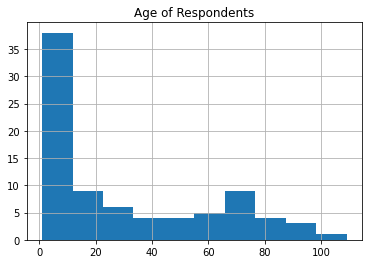

In [47]:
counts.hist(bins=10)
plt.title('Age of Respondents')

### Pie Chart of Gender of Respondents

Text(0.5, 1.0, 'Percentage of Respondents by Gender')

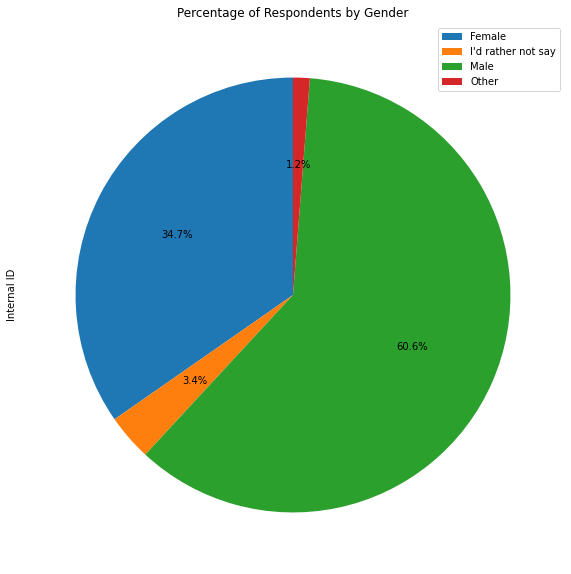

In [48]:
#pie chart with only Gender grouping
#start angle at 90 degrees -- 12 o'clock
#No labels -- just using legend

#using Internal ID as y since it's the primary key and it holds a value for each survey respondent
data_candy_df.groupby(['Q2: GENDER']).count().plot(kind='pie',y='Internal ID',figsize=(20,10), autopct='%1.1f%%',legend=True,startangle=90,labels=None)
#title for pie chart
plt.title('Percentage of Respondents by Gender')

### Bar Plot for Overall Survey Responses Towards Full-Sized Candy Bars

Text(0.5, 1.0, 'Full-Sized Candy Bars Bring Joy!')

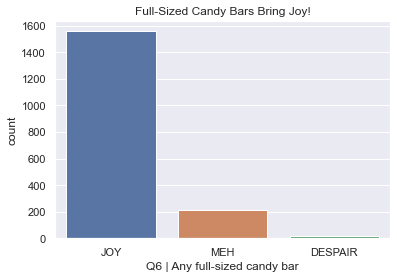

In [49]:
sns.set(style="darkgrid")
ax = sns.countplot(x='Q6 | Any full-sized candy bar', data=data_candy_df)
ax.set_title('Full-Sized Candy Bars Bring Joy!')